In [1]:
# conda install requests

In [2]:
import requests
import json
import time
import pandas as pd
import matplotlib.pyplot as plt

### First, I will import my top tracks dataframe from other notebook

In [3]:
tracksdf=pd.read_csv('lastfm_top_tracks.csv')
df= pd.DataFrame(tracksdf)

In [4]:
df

,artist,track,play_count
0,La Maravillosa Orquesta del Alcohol,La vuelta,12
1,Harry Styles,To Be So Lonely,6
2,Harry Styles,Watermelon Sugar,6
3,Harry Styles,Golden,5
4,Jarabe de Palo,Tú Mandas,5
5,Harry Styles,Treat People with Kindness,4
6,La Maravillosa Orquesta del Alcohol,Conduciendo y Llorando,3
7,Adele,Someone Like You,2
8,Harry Styles,She,2
9,John Legend,God Only Knows (feat. yMusic),2


In [5]:
df.shape

(37, 3)

In [6]:
df.isnull().any().any()

False

In [7]:
#pip install spotipy --upgrade

In [1]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials

SPOTIPY_CLIENT_ID = 'YOUR_ID'
SPOTIPY_CLIENT_SECRET = 'YOUR_SECRET_KEY'

client_credentials_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID,
                                                      client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

### How to retrieve single Spotify URI

In [9]:
artist = 'Harry Styles'
track = 'Watermelon sugar'
q = 'artist:{} track: {}'.format(artist, track)
results = sp.search(q=q, limit=1, type='track')
print(results['tracks']['items'][0]['uri'])

spotify:track:6UelLqGlWMcVH1E5c4H7lY


In [10]:
# it works!

In [11]:
    saved_uris = []
    artist_names = df['artist'].values
    track_names = df['track'].values
    
    for i in range(len(artist_names)):
        artist = artist_names[i]
        track = track_names[i]
        q = 'artist:{} track: {}'.format(artist, track)
        results = sp.search(q=q, limit=1, type='track')
        uri = results['tracks']['items'][0]['uri']
        saved_uris.append(uri)
        
    print(saved_uris)

['spotify:track:3YsSrx48KZev7vwh7Q60bW', 'spotify:track:5JiH89mHrv9oWHlD0T326z', 'spotify:track:6UelLqGlWMcVH1E5c4H7lY', 'spotify:track:45S5WTQEGOB1VHr1Q4FuPl', 'spotify:track:4fwbYkgNGj2C8sRYRijbod', 'spotify:track:03mMSLEJCPoGJwQhHpN5y0', 'spotify:track:4zTSNEmvuSKM9dmsZhdXoe', 'spotify:track:4kflIGfjdZJW4ot2ioixTB', 'spotify:track:6SQLk9HSNketfgs2AyIiMs', 'spotify:track:4mhcNoThsVSE1Mpnb7Wnj6', 'spotify:track:4jNQkWhuzqrbqQuqanFFJ6', 'spotify:track:37X505Iu3dYrZGBhbN6kNP', 'spotify:track:54X78diSLoUDI3joC2bjMz', 'spotify:track:3CKCZ9pfwAfoMZlMncA1Nc', 'spotify:track:2vCeiBLcH8GE9glPD6DqDf', 'spotify:track:1Sey4AxNpGoPNnBPszy8TE', 'spotify:track:69YDupexPCFwKmEVejktZ5', 'spotify:track:1IF5UcqRO42D12vYwceOY6', 'spotify:track:33SNO8AaciGbNaQFkxvPrW', 'spotify:track:5kRPPEWFJIMox5qIkQkiz5', 'spotify:track:0OvunixTw2i118Pkwm7l2K', 'spotify:track:0PpiaOdNaP2LehDMo1yeKi', 'spotify:track:3zz4oi4aiOUV6lcQfKP5pU', 'spotify:track:0POoXCqMIUul7VVH8SfjWV', 'spotify:track:1MEVq5Th4tyT93iOs9uUiX',

In [12]:
saved_uris

['spotify:track:3YsSrx48KZev7vwh7Q60bW',
 'spotify:track:5JiH89mHrv9oWHlD0T326z',
 'spotify:track:6UelLqGlWMcVH1E5c4H7lY',
 'spotify:track:45S5WTQEGOB1VHr1Q4FuPl',
 'spotify:track:4fwbYkgNGj2C8sRYRijbod',
 'spotify:track:03mMSLEJCPoGJwQhHpN5y0',
 'spotify:track:4zTSNEmvuSKM9dmsZhdXoe',
 'spotify:track:4kflIGfjdZJW4ot2ioixTB',
 'spotify:track:6SQLk9HSNketfgs2AyIiMs',
 'spotify:track:4mhcNoThsVSE1Mpnb7Wnj6',
 'spotify:track:4jNQkWhuzqrbqQuqanFFJ6',
 'spotify:track:37X505Iu3dYrZGBhbN6kNP',
 'spotify:track:54X78diSLoUDI3joC2bjMz',
 'spotify:track:3CKCZ9pfwAfoMZlMncA1Nc',
 'spotify:track:2vCeiBLcH8GE9glPD6DqDf',
 'spotify:track:1Sey4AxNpGoPNnBPszy8TE',
 'spotify:track:69YDupexPCFwKmEVejktZ5',
 'spotify:track:1IF5UcqRO42D12vYwceOY6',
 'spotify:track:33SNO8AaciGbNaQFkxvPrW',
 'spotify:track:5kRPPEWFJIMox5qIkQkiz5',
 'spotify:track:0OvunixTw2i118Pkwm7l2K',
 'spotify:track:0PpiaOdNaP2LehDMo1yeKi',
 'spotify:track:3zz4oi4aiOUV6lcQfKP5pU',
 'spotify:track:0POoXCqMIUul7VVH8SfjWV',
 'spotify:track:

In [13]:
    artist = []
    track = []
    
    danceability = []
    energy = []
    key = []
    loudness = []
    mode = []
    speechiness = []
    acousticness = []
    instrumentalness = []
    liveness = []
    valence = []
    tempo = []
    duration_ms = []

    for uri in saved_uris:
        x = sp.audio_features(uri)
        y = sp.track(uri)
        for audio_features in x:
            danceability.append(audio_features['danceability'])
            energy.append(audio_features['energy'])
            key.append(audio_features['key'])
            loudness.append(audio_features['loudness'])
            mode.append(audio_features['mode'])
            speechiness.append(audio_features['speechiness'])
            acousticness.append(audio_features['acousticness'])
            instrumentalness.append(audio_features['instrumentalness'])
            liveness.append(audio_features['liveness'])
            valence.append(audio_features['valence'])
            tempo.append(audio_features['tempo'])
            duration_ms.append(audio_features['duration_ms'])
            print('append')
      
        artist.append(y['album']['artists'][0]['name'])
        track.append(y['name'])

    df1 = pd.DataFrame()
    df1['artist'] = artist
    df1['track'] = track
    df1['danceability'] = danceability
    df1['energy'] = energy
    df1['key'] = key
    df1['loudness'] = loudness
    df1['mode'] = mode
    df1['speechiness'] = speechiness
    df1['acousticness'] = acousticness
    df1['instrumentalness'] = instrumentalness
    df1['liveness'] = liveness
    df1['valence'] = valence
    df1['tempo'] = tempo
    df1['duration_ms'] = duration_ms
    
    df1.to_csv('OnelateAudioFeatures.csv')

append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append


In [14]:
df1

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,La Maravillosa Orquesta del Alcohol,La vuelta,0.521,0.436,8,-7.263,0,0.0260,0.726000,0.000000,0.0946,0.2960,63.390,182531
1,Harry Styles,To Be So Lonely,0.758,0.436,0,-7.269,1,0.0418,0.618000,0.000016,0.3350,0.6050,104.959,192080
2,Harry Styles,Watermelon Sugar,0.548,0.816,0,-4.209,1,0.0465,0.122000,0.000000,0.3350,0.5570,95.390,174000
3,Harry Styles,Golden,0.448,0.838,4,-5.257,0,0.0557,0.210000,0.000131,0.1310,0.2540,139.863,208907
4,Jarabe De Palo,Tú Mandas,0.643,0.834,11,-10.542,1,0.0376,0.243000,0.000050,0.1230,0.5540,128.829,190204
5,Harry Styles,Treat People With Kindness,0.653,0.869,5,-3.725,1,0.0382,0.128000,0.000022,0.0460,0.6970,122.017,197347
6,La Maravillosa Orquesta del Alcohol,Conduciendo y Llorando,0.571,0.730,9,-7.381,0,0.0578,0.067700,0.000057,0.3600,0.3060,130.583,210452
7,Adele,Someone Like You,0.559,0.330,9,-8.251,1,0.0285,0.892000,0.000000,0.0975,0.2850,135.109,285040
8,Harry Styles,She,0.535,0.521,0,-5.942,1,0.0272,0.000532,0.371000,0.1900,0.4570,140.026,362653
9,John Legend,God Only Knows (feat. yMusic),0.272,0.158,9,-9.829,1,0.0319,0.943000,0.000076,0.1580,0.2400,83.385,201800


In [16]:
df2=df1.head(6)

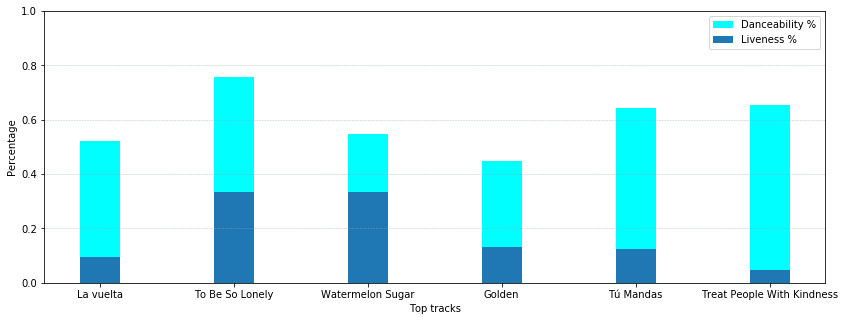

In [20]:
plt.figure(figsize=(14,5))
width=0.3
plt.bar(df2.track, df2.danceability, color='cyan',width=width, label='Danceability %')
plt.bar(df2.track, df2.liveness,width=width, label='Liveness %')
plt.xlabel('Top tracks')
plt.ylabel('Percentage')
plt.ylim(0,1)
plt.legend()
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.savefig('danceability_chart.png')